<a href="https://colab.research.google.com/github/manuel103/Machine-Learning/blob/master/Comparing%20Health%20Systems%20Using%20World%20Bank%20COVID-19%20Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [128]:
from google.colab import files
uploads = files.upload()

Saving Health Systems Dataset.csv to Health Systems Dataset (6).csv


In [129]:
data = pd.read_csv('Health Systems Dataset.csv')
# data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country_Region                        187 non-null    object 
 1   Province_State                        14 non-null     object 
 2   World_Bank_Name                       210 non-null    object 
 3   Health_exp_pct_GDP_2016               186 non-null    float64
 4   Health_exp_public_pct_2016            186 non-null    float64
 5   Health_exp_out_of_pocket_pct_2016     186 non-null    float64
 6   Health_exp_per_capita_USD_2016        186 non-null    float64
 7   per_capita_exp_PPP_2016               186 non-null    float64
 8   External_health_exp_pct_2016          167 non-null    float64
 9   Physicians_per_1000_2009-18           189 non-null    float64
 10  Nurse_midwife_per_1000_2009-18        189 non-null    float64
 11  Specialist_surgical

In [130]:
data.head()

,Country_Region,Province_State,World_Bank_Name,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18,Completeness_of_death_reg_2008-16
0,Afghanistan,NaN,Afghanistan,10.2,5.1,77.4,57.2,162.8,17.5,0.3,0.3,0.0,42.3,NaN
1,Albania,NaN,Albania,6.7,41.4,58.0,271.5,759.7,0.7,1.2,3.6,11.6,98.4,53.0
2,Algeria,NaN,Algeria,6.6,67.7,30.9,260.4,998.2,0.0,1.8,2.2,12.1,100.0,NaN
3,Andorra,NaN,Andorra,10.4,49.1,41.7,3834.7,4978.7,NaN,3.3,4.0,83.1,100.0,80.0
4,Angola,NaN,Angola,2.9,44.1,35.2,95.2,185.8,3.6,0.2,1.3,NaN,25.0,NaN


# **Data Cleaning**

In [131]:
# Drop useless columns
df = pd.DataFrame(data)
df = data.drop(['Country_Region', 'Province_State'], axis = 1)
df.head()

,World_Bank_Name,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18,Completeness_of_death_reg_2008-16
0,Afghanistan,10.2,5.1,77.4,57.2,162.8,17.5,0.3,0.3,0.0,42.3,NaN
1,Albania,6.7,41.4,58.0,271.5,759.7,0.7,1.2,3.6,11.6,98.4,53.0
2,Algeria,6.6,67.7,30.9,260.4,998.2,0.0,1.8,2.2,12.1,100.0,NaN
3,Andorra,10.4,49.1,41.7,3834.7,4978.7,NaN,3.3,4.0,83.1,100.0,80.0
4,Angola,2.9,44.1,35.2,95.2,185.8,3.6,0.2,1.3,NaN,25.0,NaN


In [132]:
# Dealing with NAN values
# We can see that most of the columns have null values (True)
df.isnull().any()

World_Bank_Name                         False
Health_exp_pct_GDP_2016                  True
Health_exp_public_pct_2016               True
Health_exp_out_of_pocket_pct_2016        True
Health_exp_per_capita_USD_2016           True
per_capita_exp_PPP_2016                  True
External_health_exp_pct_2016             True
Physicians_per_1000_2009-18              True
Nurse_midwife_per_1000_2009-18           True
Specialist_surgical_per_1000_2008-18     True
Completeness_of_birth_reg_2009-18        True
Completeness_of_death_reg_2008-16        True
dtype: bool

**To deal with null values, we need to fill them with a measure of central tendency. We need to find out which measure is the best to use.**

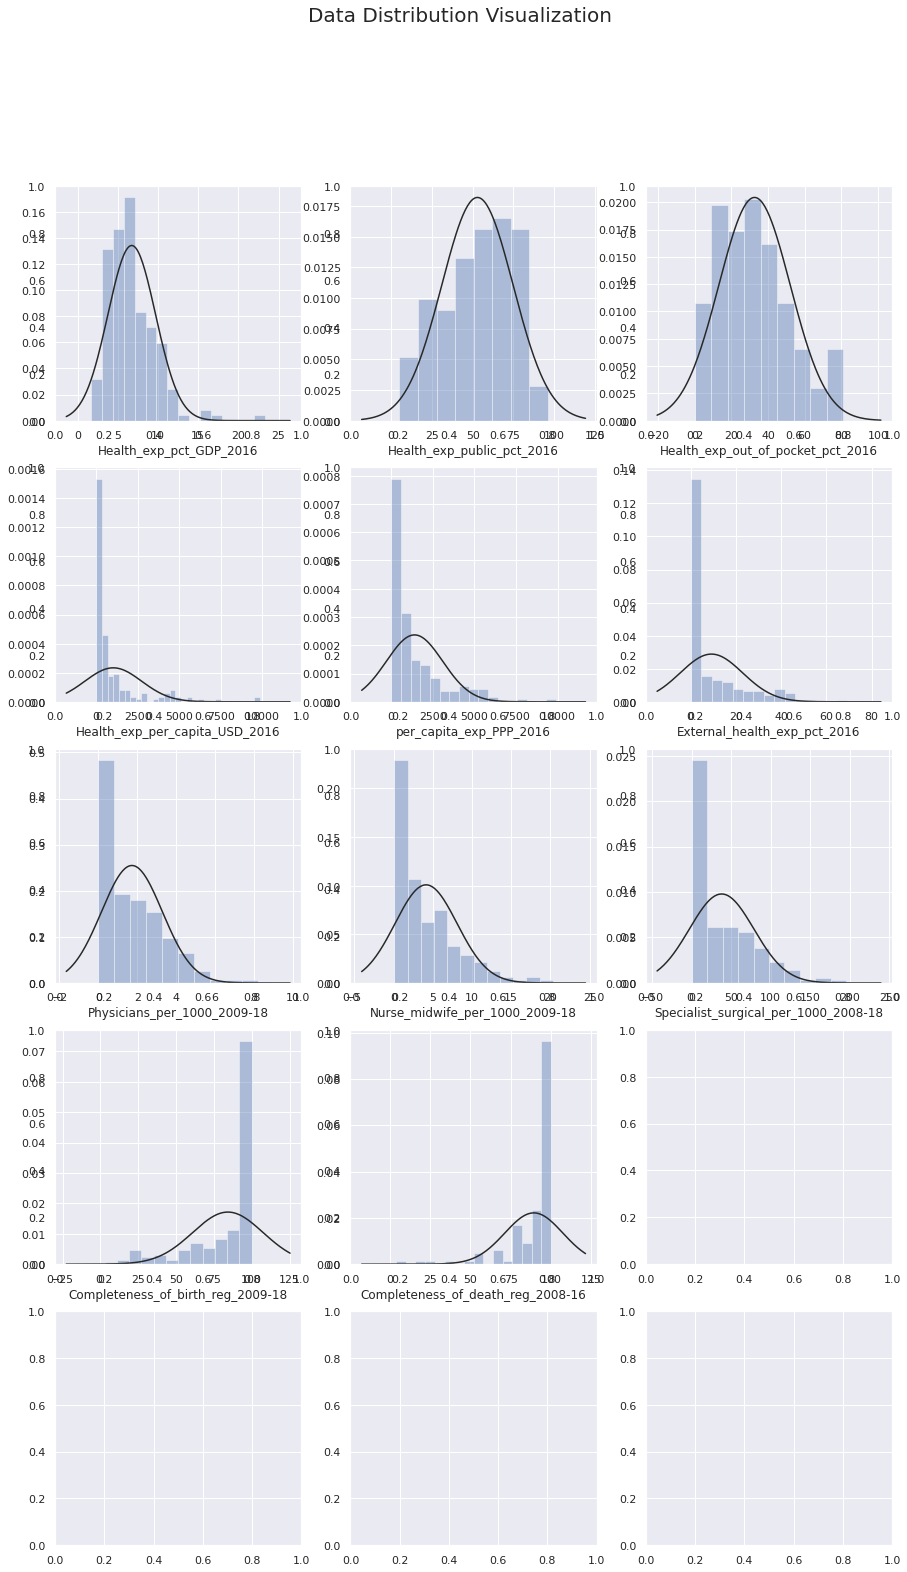

In [133]:
from scipy.stats import norm
fig, axes = plt.subplots(5, 3, figsize=(15, 25))
fig.suptitle('Data Distribution Visualization', fontsize=20)

for i, col in enumerate(df.columns[1:]):
  ax=fig.add_subplot(5, 3, i+1)
  sns.distplot(df[col],fit=norm, kde=False,ax=ax)
# plt.plot()

**We can observe that our data is either skewed to the right or to the left & the median would be the most suitable measure of central tendency to replace with**

In [134]:
# Filling NAN values with their median
df = df.fillna(df.median())
df.isnull().any()

World_Bank_Name                         False
Health_exp_pct_GDP_2016                 False
Health_exp_public_pct_2016              False
Health_exp_out_of_pocket_pct_2016       False
Health_exp_per_capita_USD_2016          False
per_capita_exp_PPP_2016                 False
External_health_exp_pct_2016            False
Physicians_per_1000_2009-18             False
Nurse_midwife_per_1000_2009-18          False
Specialist_surgical_per_1000_2008-18    False
Completeness_of_birth_reg_2009-18       False
Completeness_of_death_reg_2008-16       False
dtype: bool

**We now don't have null values as shown by bolean value, False**

In [135]:
df.head()

,World_Bank_Name,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18,Completeness_of_death_reg_2008-16
0,Afghanistan,10.2,5.1,77.4,57.2,162.8,17.5,0.3,0.3,0.0,42.3,99.0
1,Albania,6.7,41.4,58.0,271.5,759.7,0.7,1.2,3.6,11.6,98.4,53.0
2,Algeria,6.6,67.7,30.9,260.4,998.2,0.0,1.8,2.2,12.1,100.0,99.0
3,Andorra,10.4,49.1,41.7,3834.7,4978.7,1.7,3.3,4.0,83.1,100.0,80.0
4,Angola,2.9,44.1,35.2,95.2,185.8,3.6,0.2,1.3,23.6,25.0,99.0


# **Data Visualization**

**We first sort the countries based on their total expenditures and compare the high spenders vs the low spenders**

In [136]:
total_exp = df.sort_values('Health_exp_pct_GDP_2016', ascending = False)
total_exp.head()
top_ten_exp = total_exp.head(10)
total_exp = total_exp.sort_values('Health_exp_pct_GDP_2016')
bot_ten_exp = total_exp.head(10)

In [137]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig = make_subplots(rows=1, cols=2, shared_yaxes=True)

fig.add_trace(
    go.Bar(x=top_ten_exp['World_Bank_Name'], y=top_ten_exp['Health_exp_pct_GDP_2016']),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=bot_ten_exp['World_Bank_Name'], y=bot_ten_exp['Health_exp_pct_GDP_2016']),
    row=1, col=2
)

fig.update_layout(
    title={
        'text': "Top Ten & Bottom ten spenders",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    plot_bgcolor= 'white',
    paper_bgcolor= 'white',
    yaxis_title="Health_exp_pct_GDP_2016 (%)",
    showlegend=False,
    font=dict(
        size=14,
        color="black"
    )
)
fig.show()

# **Observations:**

The top 10 spenders are:
1.   Marshall Islands
2. United States
3. Sierra Leone
4. Tuvalu
5. Micronesia. Fed. Sts
6. Switzerland
7. Cuba
8. Kiribati
9. Brazil
10. Palau

The bottom 10 spenders are:
1. Monaco
2. Papua New Guinea
3. Brunei Darussalam
4. Bangladesh
5. Lao PDR
6. Pakistan
7. Angola
8. Eritrea
9. Gabon
10. Indonesia

# **Using KNN to map the spenders**

**First check the data distribution for the data column we are trying to predict (Health_exp_pct_GDP_2016)**

In [138]:
print('Mean: ', df['Health_exp_pct_GDP_2016'].mean())
print('Median: ', df['Health_exp_pct_GDP_2016'].median())
print('Mode: ', df['Health_exp_pct_GDP_2016'].mode()[0])

Mean:  6.656190476190477
Median:  6.2
Mode:  6.2


The median is smaller than mean and we may use it to categorize by
Transforming the column *Health_exp_pct_GDP_2016* to categorical data

In [139]:
def cat_Health_exp_pct_GDP_2016(row):
    if row > 6.2:
        row = 1
    else:
        row = 0
    return row
# create a new column for spending category
df['Spending_category'] = df['Health_exp_pct_GDP_2016'].apply(cat_Health_exp_pct_GDP_2016)
# We now no longer need the Health_exp_pct_GDP_2016 column
df.drop('Health_exp_pct_GDP_2016', axis=1, inplace=True)
df.head()

,World_Bank_Name,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18,Completeness_of_death_reg_2008-16,Spending_category
0,Afghanistan,5.1,77.4,57.2,162.8,17.5,0.3,0.3,0.0,42.3,99.0,1
1,Albania,41.4,58.0,271.5,759.7,0.7,1.2,3.6,11.6,98.4,53.0,1
2,Algeria,67.7,30.9,260.4,998.2,0.0,1.8,2.2,12.1,100.0,99.0,1
3,Andorra,49.1,41.7,3834.7,4978.7,1.7,3.3,4.0,83.1,100.0,80.0,1
4,Angola,44.1,35.2,95.2,185.8,3.6,0.2,1.3,23.6,25.0,99.0,0


In [140]:
# Also remove the World_Bank_Name column since it's not categorical and may interfere with accuracy
df.drop('World_Bank_Name', axis=1, inplace=True)
df.head()

,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18,Completeness_of_death_reg_2008-16,Spending_category
0,5.1,77.4,57.2,162.8,17.5,0.3,0.3,0.0,42.3,99.0,1
1,41.4,58.0,271.5,759.7,0.7,1.2,3.6,11.6,98.4,53.0,1
2,67.7,30.9,260.4,998.2,0.0,1.8,2.2,12.1,100.0,99.0,1
3,49.1,41.7,3834.7,4978.7,1.7,3.3,4.0,83.1,100.0,80.0,1
4,44.1,35.2,95.2,185.8,3.6,0.2,1.3,23.6,25.0,99.0,0


In [141]:
# Get dependent and independent variables which will be used in the training and testing of our model
y = df['Spending_category']
print(y[:5])
X = df.drop('Spending_category', axis=1)
X.head()

0    1
1    1
2    1
3    1
4    0
Name: Spending_category, dtype: int64


,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18,Completeness_of_death_reg_2008-16
0,5.1,77.4,57.2,162.8,17.5,0.3,0.3,0.0,42.3,99.0
1,41.4,58.0,271.5,759.7,0.7,1.2,3.6,11.6,98.4,53.0
2,67.7,30.9,260.4,998.2,0.0,1.8,2.2,12.1,100.0,99.0
3,49.1,41.7,3834.7,4978.7,1.7,3.3,4.0,83.1,100.0,80.0
4,44.1,35.2,95.2,185.8,3.6,0.2,1.3,23.6,25.0,99.0


**Spliting dataset into training set and test set**

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 99)

In [143]:
# from sklearn import preprocessing
# from sklearn import utils

# lab_enc = preprocessing.LabelEncoder()
# encoded = lab_enc.fit_transform(y_train)

**# Fitting clasifier to the Training set**

In [147]:
from sklearn.preprocessing import PowerTransformer

pow_trans = PowerTransformer() # Used in data normalization during preprocessing

pow_trans.fit(X_train)# Fit the X_training data to PowerTransformer

X_train_normalized = pow_trans.transform(X_train)
X_test_normalized = pow_trans.transform(X_test)

# This is now our final normalized data
X_train_normalized = pd.DataFrame(X_train_normalized, columns=X_train.columns, index=X_train.index)
X_test_normalized = pd.DataFrame(X_test_normalized, columns=X_test.columns, index=X_test.index)

**We need to evaluate our model's predictions using a confusion matrix since it gives a clear insight of the performance.**

In [148]:
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# from sklearn.model_selection import cross_val_score

# Instantiate learning model (k = 3)
classifier = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
classifier.fit(X_train, y_train)

# # Predicting the Test set results
y_pred = classifier.predict(X_test)

# The confusion matrix:
print(confusion_matrix(y_test, y_pred))

# The classification report...
print('\n', classification_report(y_test, y_pred))

[[19  7]
 [ 8  8]]

               precision    recall  f1-score   support

           0       0.70      0.73      0.72        26
           1       0.53      0.50      0.52        16

    accuracy                           0.64        42
   macro avg       0.62      0.62      0.62        42
weighted avg       0.64      0.64      0.64        42



 **And now to judge the performance of our model....**

In [149]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is 64.29 %.


# **Using cross-validation for parameter tuning:**

**The model did not perform so well, so we need a better value of k (number of neighbours)**

In [150]:
# creating list of K for KNN
k_list = list(range(1,50,2))

# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

<Figure size 432x288 with 0 Axes>

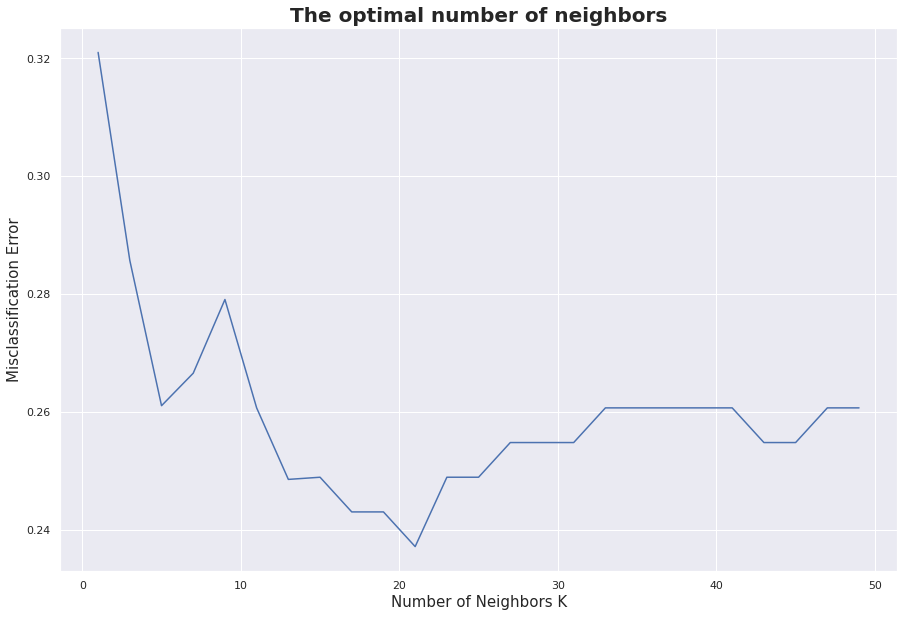

In [151]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [152]:
# finding best k
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 21.


**Now we train again our model using a k value of 21**

In [153]:
# Instantiate learning model (k = 21)
classifier = KNeighborsClassifier(n_neighbors=21)

# Fitting the model
classifier.fit(X_train, y_train)

# # Predicting the Test set results
y_pred = classifier.predict(X_test)

# The confusion matrix:
print(confusion_matrix(y_test, y_pred))

# The classification report...
print('\n', classification_report(y_test, y_pred))

[[23  3]
 [10  6]]

               precision    recall  f1-score   support

           0       0.70      0.88      0.78        26
           1       0.67      0.38      0.48        16

    accuracy                           0.69        42
   macro avg       0.68      0.63      0.63        42
weighted avg       0.69      0.69      0.67        42



In [154]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is 69.05 %.


**The model accuracy has greatly improved with more neighbours**
<br>
**Our precision and recall values are 70% and 88% respectively, which means the model performed fairly well in the prediction of the countries with high and low spending**